# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 2 of Set 1 | vilyuchinsk
City not found. Skipping...
Processing Record 3 of Set 1 | bethel
City not found. Skipping...
Processing Record 4 of Set 1 | isafjordur
City not found. Skipping...
Processing Record 5 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 6 of Set 1 | college
City not found. Skipping...
Processing Record 7 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 8 of Set 1 | hawaiian paradise park
City not found. Skipping...
Processing Record 9 of Set 1 | nadi
City not found. Skipping...
Processing Record 10 of Set 1 | adamstown
City not found. Skipping...
Processing Record 11 of Set 1 | olonkinbyen
City not found. Skipping...
Processing Record 12 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 13 of Set 1 | tiksi
City not found. Skipping...
Processing Recor

City not found. Skipping...
Processing Record 22 of Set 3 | cruz del eje
City not found. Skipping...
Processing Record 23 of Set 3 | stornoway
City not found. Skipping...
Processing Record 24 of Set 3 | petropavlovsk-kamchatsky
City not found. Skipping...
Processing Record 25 of Set 3 | anna regina
City not found. Skipping...
Processing Record 26 of Set 3 | luanda
City not found. Skipping...
Processing Record 27 of Set 3 | sainte-rose
City not found. Skipping...
Processing Record 28 of Set 3 | ujae
City not found. Skipping...
Processing Record 29 of Set 3 | saint-joseph
City not found. Skipping...
Processing Record 30 of Set 3 | port elizabeth
City not found. Skipping...
Processing Record 31 of Set 3 | kerikeri
City not found. Skipping...
Processing Record 32 of Set 3 | susuman
City not found. Skipping...
Processing Record 33 of Set 3 | georgetown
City not found. Skipping...
Processing Record 34 of Set 3 | sterling
City not found. Skipping...
Processing Record 35 of Set 3 | ust-nera
Ci

City not found. Skipping...
Processing Record 43 of Set 5 | akureyri
City not found. Skipping...
Processing Record 44 of Set 5 | uturoa
City not found. Skipping...
Processing Record 45 of Set 5 | cururupu
City not found. Skipping...
Processing Record 46 of Set 5 | thompson
City not found. Skipping...
Processing Record 47 of Set 5 | salinopolis
City not found. Skipping...
Processing Record 48 of Set 5 | chiungutwa
City not found. Skipping...
Processing Record 49 of Set 5 | weno
City not found. Skipping...
Processing Record 0 of Set 6 | konkwesso
City not found. Skipping...
Processing Record 1 of Set 6 | queenstown
City not found. Skipping...
Processing Record 2 of Set 6 | kroya
City not found. Skipping...
Processing Record 3 of Set 6 | al harithah
City not found. Skipping...
Processing Record 4 of Set 6 | mili
City not found. Skipping...
Processing Record 5 of Set 6 | yuzhno-kurilsk
City not found. Skipping...
Processing Record 6 of Set 6 | marsh harbour
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 12 of Set 8 | ancud
City not found. Skipping...
Processing Record 13 of Set 8 | inongo
City not found. Skipping...
Processing Record 14 of Set 8 | brookings
City not found. Skipping...
Processing Record 15 of Set 8 | kulia village
City not found. Skipping...
Processing Record 16 of Set 8 | menaka
City not found. Skipping...
Processing Record 17 of Set 8 | magadan
City not found. Skipping...
Processing Record 18 of Set 8 | itamaraca
City not found. Skipping...
Processing Record 19 of Set 8 | rabigh
City not found. Skipping...
Processing Record 20 of Set 8 | constantia
City not found. Skipping...
Processing Record 21 of Set 8 | namibe
City not found. Skipping...
Processing Record 22 of Set 8 | spas-klepiki
City not found. Skipping...
Processing Record 23 of Set 8 | rio grande
City not found. Skipping...
Processing Record 24 of Set 8 | verkhnevilyuysk
City not found. Skipping...
Processing Record 25 of Set 8 | narasannapeta
City not found. Ski

City not found. Skipping...
Processing Record 34 of Set 10 | olgii
City not found. Skipping...
Processing Record 35 of Set 10 | boguchany
City not found. Skipping...
Processing Record 36 of Set 10 | cabedelo
City not found. Skipping...
Processing Record 37 of Set 10 | khammam
City not found. Skipping...
Processing Record 38 of Set 10 | shahrak
City not found. Skipping...
Processing Record 39 of Set 10 | kayangel
City not found. Skipping...
Processing Record 40 of Set 10 | thal
City not found. Skipping...
Processing Record 41 of Set 10 | yarmouth
City not found. Skipping...
Processing Record 42 of Set 10 | hualien city
City not found. Skipping...
Processing Record 43 of Set 10 | paka
City not found. Skipping...
Processing Record 44 of Set 10 | neiafu
City not found. Skipping...
Processing Record 45 of Set 10 | junagarh
City not found. Skipping...
Processing Record 46 of Set 10 | abbeville
City not found. Skipping...
Processing Record 47 of Set 10 | mukalla
City not found. Skipping...
Pr

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-16.15,85,75,2.57,CA,2023-04-19 02:36:51
1,albany,42.6001,-73.9662,5.68,79,85,0.45,US,2023-04-19 02:35:22
2,kharan,28.5833,65.4167,19.20,52,0,1.45,PK,2023-04-19 02:40:44
3,edinburgh of the seven seas,-37.0676,-12.3116,15.63,63,95,5.87,SH,2023-04-19 02:36:42
4,waitangi,-43.9535,-176.5597,17.68,86,100,2.68,NZ,2023-04-19 02:36:44


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-16.15,85,75,2.57,CA,2023-04-19 02:36:51
1,albany,42.6001,-73.9662,5.68,79,85,0.45,US,2023-04-19 02:35:22
2,kharan,28.5833,65.4167,19.20,52,0,1.45,PK,2023-04-19 02:40:44
3,edinburgh of the seven seas,-37.0676,-12.3116,15.63,63,95,5.87,SH,2023-04-19 02:36:42
4,waitangi,-43.9535,-176.5597,17.68,86,100,2.68,NZ,2023-04-19 02:36:44


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

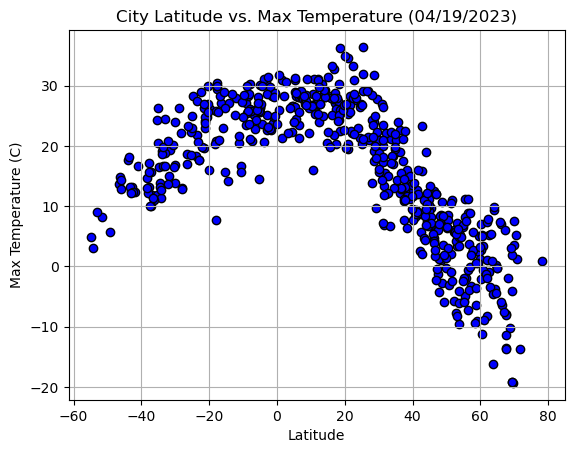

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, alpha=1, color='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/19/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

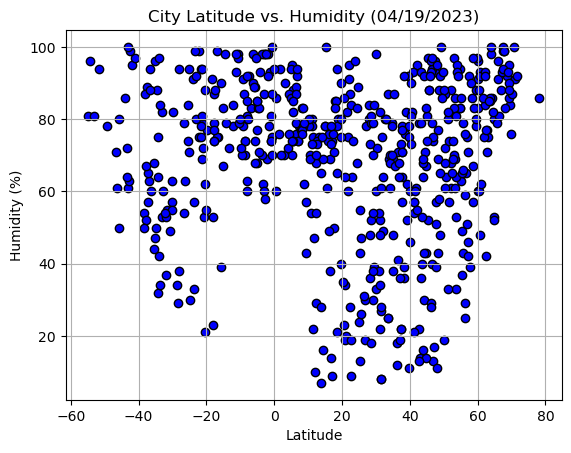

In [53]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, alpha=1, color='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/19/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

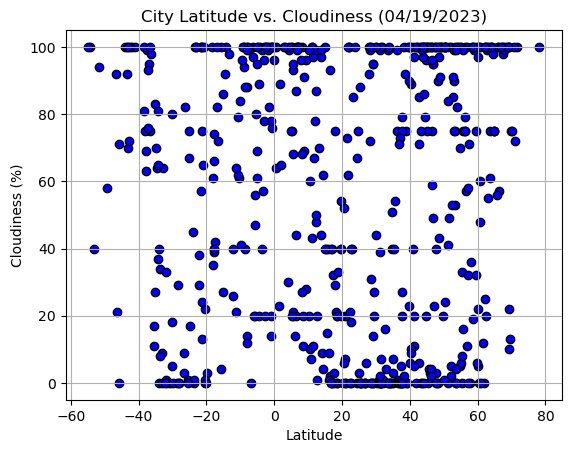

In [54]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, alpha=1, color='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/19/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

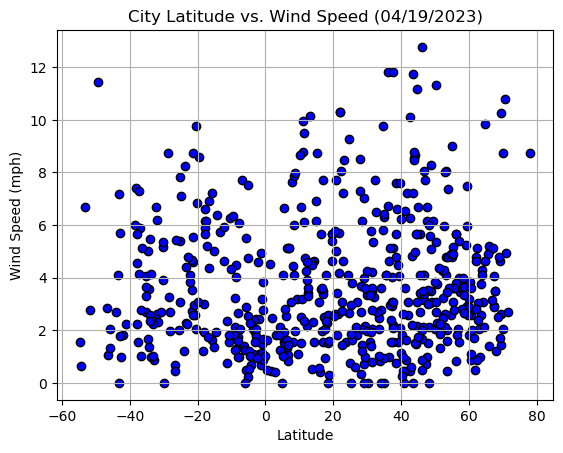

In [55]:

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, alpha=1, color='blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/19/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot with linear regression line
    plt.scatter(x_values, y_values, color="blue", edgecolors="black")
    plt.plot(x_values, regress_values, color="red")

    # Add labels and title to plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add text to plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-16.15,85,75,2.57,CA,2023-04-19 02:36:51
1,albany,42.6001,-73.9662,5.68,79,85,0.45,US,2023-04-19 02:35:22
2,kharan,28.5833,65.4167,19.20,52,0,1.45,PK,2023-04-19 02:40:44
6,olonkinbyen,70.9221,-8.7187,1.26,91,72,4.94,SJ,2023-04-19 02:36:55
8,djamaa,33.5339,5.9931,21.11,25,99,2.48,DZ,2023-04-19 02:40:44


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,15.63,63,95,5.87,SH,2023-04-19 02:36:42
4,waitangi,-43.9535,-176.5597,17.68,86,100,2.68,NZ,2023-04-19 02:36:44
5,puerto natales,-51.7236,-72.4875,8.23,94,94,2.77,CL,2023-04-19 02:36:42
7,queenstown,-31.8976,26.8753,14.94,37,1,2.61,ZA,2023-04-19 02:37:12
14,adamstown,-25.0660,-130.1015,24.93,71,67,7.82,PN,2023-04-19 02:36:47


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7897627598211622


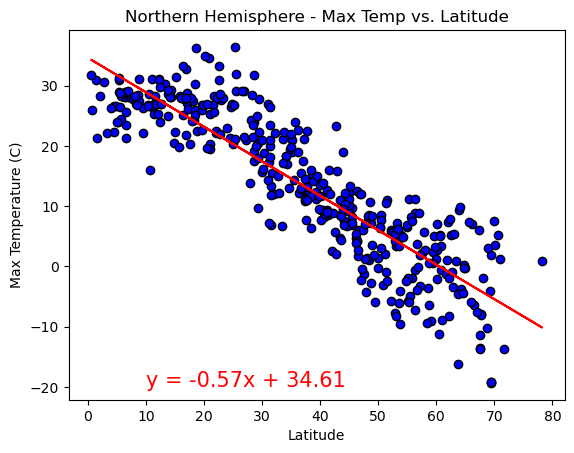

<Figure size 640x480 with 0 Axes>

In [89]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", "Northern Hemisphere - Max Temp vs. Latitude", (10, -20))

# Save the figure
plt.savefig("output_data/Fig5.png")

The r-squared is: 0.5656847466504815


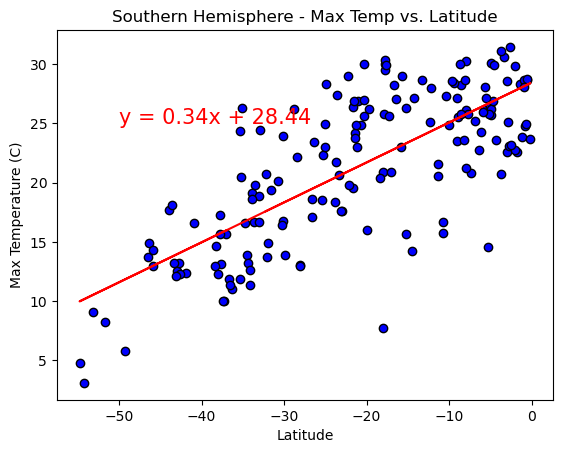

<Figure size 640x480 with 0 Axes>

In [90]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", "Southern Hemisphere - Max Temp vs. Latitude", (-50, 25))

# Save the figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** For both hemispheres, there is a clear relationship between latitude and maximum temperature. In the Northern Hemisphere, as latitude increases, maximum temperature tends to decrease. In the Southern Hemisphere, as latitude approaches 0 (i.e., the equator), maximum temperature tends to increase. These relationships make sense as they reflect the differences in direct sunlight received at different latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16


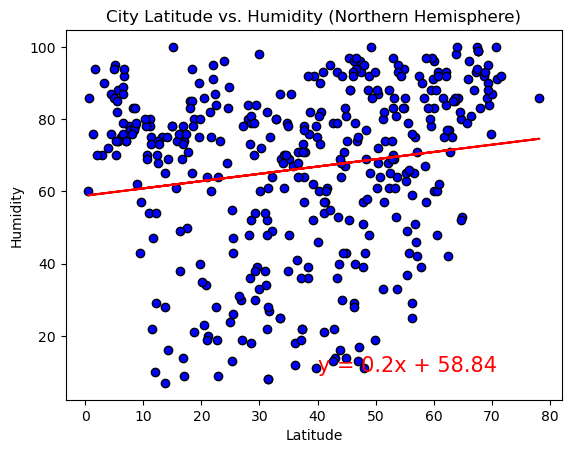

<Figure size 640x480 with 0 Axes>

In [91]:
# Northern Hemisphere
# Create a scatter plot of latitude vs. humidity for Northern Hemisphere cities
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Latitude", "Humidity", "City Latitude vs. Humidity (Northern Hemisphere)", 
                       (40,10))
# Save the figure
plt.savefig("output_data/Fig7.png")

The r-value is: 0.25


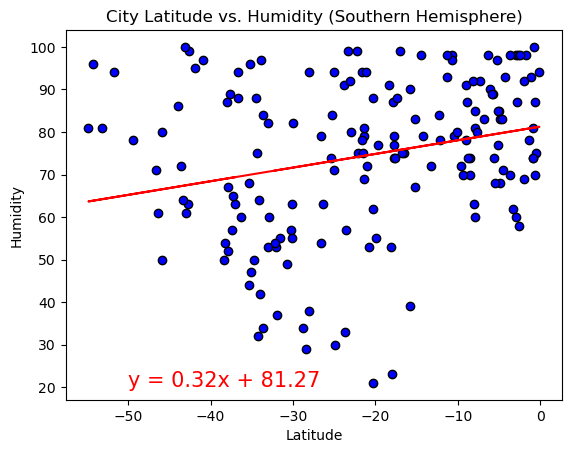

<Figure size 640x480 with 0 Axes>

In [92]:
# Southern Hemisphere
# Create a scatter plot of humidity vs. latitude for Southern Hemisphere cities
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Latitude", "Humidity", "City Latitude vs. Humidity (Southern Hemisphere)", 
                       (-50,20))
# Save the figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** The scatter plots for humidity vs. latitude in both hemispheres show no strong linear relationship. However, the linear regression models for both hemispheres suggest a weak positive correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17


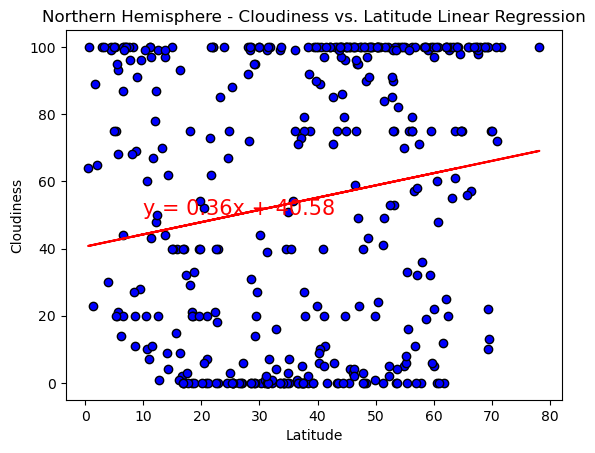

<Figure size 640x480 with 0 Axes>

In [93]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (10,50))

# Save the figure
plt.savefig("output_data/Fig9.png")

The r-value is: 0.13


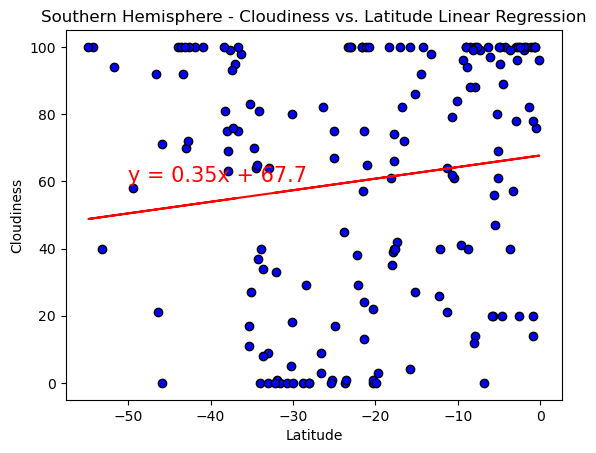

<Figure size 640x480 with 0 Axes>

In [94]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-50,60))

# Save the figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** For both the northern and southern hemispheres, there doesn't appear to be a strong linear relationship between cloudiness and latitude. The R-squared values are low, indicating that only a small proportion of the variation in cloudiness can be explained by latitude. Additionally, the slopes of the regression lines are close to 0, which suggests that there is no significant trend in cloudiness as latitude increases or decreases. Therefore, we can conclude that latitude is not a strong predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07


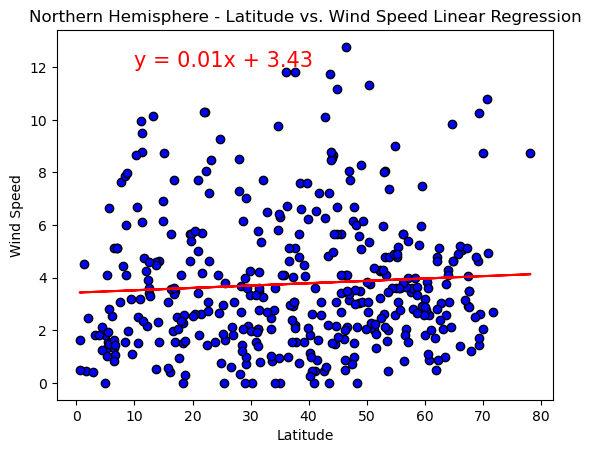

<Figure size 640x480 with 0 Axes>

In [95]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                        "Latitude", "Wind Speed", "Northern Hemisphere - Latitude vs. Wind Speed Linear Regression",
                        (10,12))

# Save the figure
plt.savefig("output_data/Fig11.png")

The r-value is: -0.17


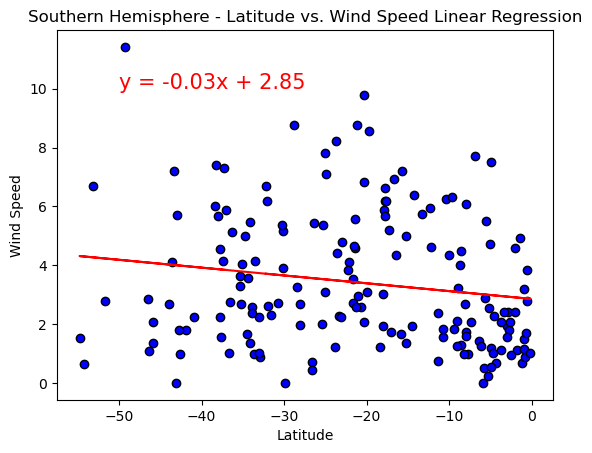

<Figure size 640x480 with 0 Axes>

In [96]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                        "Latitude", "Wind Speed", "Southern Hemisphere - Latitude vs. Wind Speed Linear Regression",
                        (-50,10))

# Save the figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** The linear regression analysis shows that there is a weak correlation between latitude and wind speed in both the northern and southern hemispheres. The slope is positive for the northern hemisphere and negative for the southern hemisphere, indicating that as latitude increases, wind speed slightly increases in the northern hemisphere and slightly decreases in the southern hemisphere. However, the low R-squared values suggest that latitude is not a strong predictor of wind speed.